In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

rng = np.random.default_rng(0)

In [2]:
def normal_density(x, mu, sigma):
    return np.sqrt(2 * np.pi * sigma**2)**-1 * np.exp(-0.5 * ((x - mu) / sigma)**2)

def std_normal_density(x):
    return normal_density(x, 0, 1)

In [3]:
def metropolis_hastings_step(position: float, proposal_sampler: callable, target_density: callable):
    # Propose a new position
    new_position = proposal_sampler(position)
    # Get acceptance ratio
    alpha = target_density(new_position) / target_density(position)
    # Take step
    if rng.uniform(0, 1) <= alpha:
        return new_position, alpha
    else:
        return position, alpha

In [6]:
def sampling(initial_position: float, proposal_sampler: callable, target_density: callable, n_steps: int):
    # Initialise chain
    chain = np.zeros(shape=(len(initial_position), n_steps))
    alpha = np.zeros(shape=(n_steps))
    # Perform sampling
    chain[:, 0] = initial_position
    alpha[0] = 0
    for i in range(1, n_steps):
        chain[:, i], alpha[i] = metropolis_hastings_step(chain[:, i-1], proposal_sampler, target_density)
    return chain, alpha

In [66]:
PROPOSAL_SCALE = 0.8
N_STEPS = int(5e5)

# proposal = lambda x : rng.normal(loc=x, scale=PROPOSAL_SCALE)
proposal = lambda x : rng.uniform(low=x-PROPOSAL_SCALE, high=x+PROPOSAL_SCALE)
target = lambda x : std_normal_density(x[0]) * std_normal_density(x[1]) * np.sin(x[0])**2 * np.cos(2*x[1])**2
initial = np.array([0.1, 0.3])

chain, alpha = sampling(initial, proposal, target, N_STEPS)

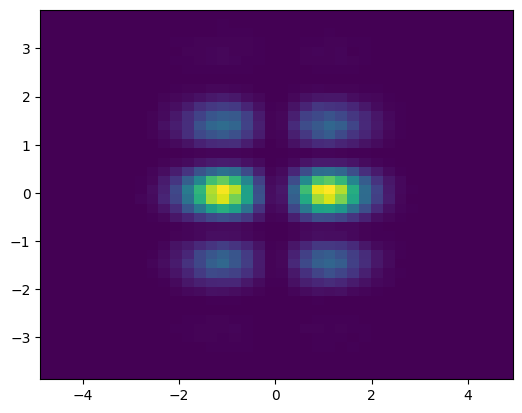

In [67]:
plt.hist2d(chain[0,:], chain[1,:], cmap="viridis", bins=(40,40))
plt.axis("scaled")
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)
plt.show()

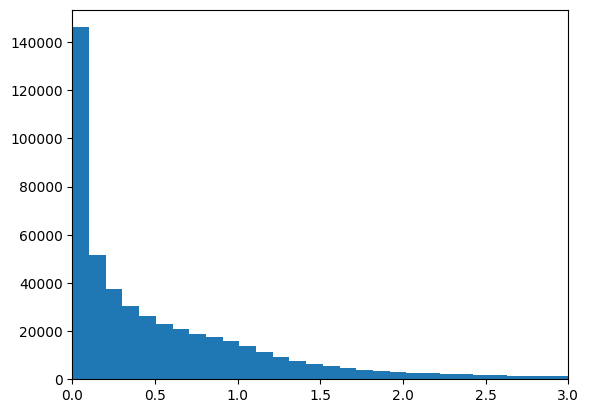

In [70]:
# x = np.linspace(-4, 4, 1000)
# p = target(x)
# norm = quad(target, a=-5, b=5)[0]
# plt.hist(chain, bins=50, density=True)
# plt.plot(x, p/norm)
# plt.show()

plt.hist(alpha, bins=np.linspace(0, 10, 100))
plt.xlim(0, 3)
plt.show()

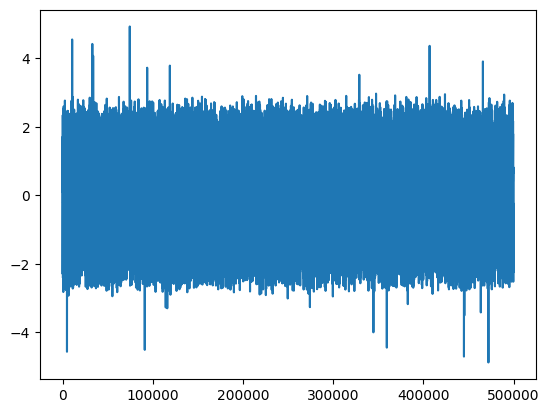

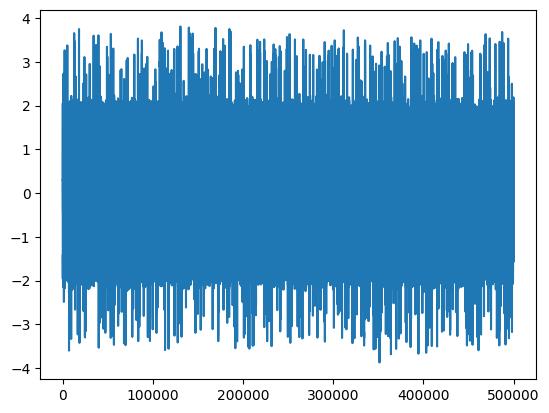

In [71]:
plt.plot(chain[0,:])
plt.show()

plt.plot(chain[1,:])
plt.show()